In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib


### Load and Prepare California Housing Dataset

In [3]:
# === Load California housing dataset ===
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target  # Median house value in $100,000s

# === Column formatting ===
df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in df.columns]
df.head()


,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Split Data into Training and Validation Sets

In [4]:
# === Split data ===
X = df.drop('target', axis=1)
y = df['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=42)


### Train Linear Regression Model

In [5]:
# === Train linear regression model ===
lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Predict and Evaluate the Model

In [6]:
# === Predict on validation data ===
y_pred = lr.predict(X_val)

# === Evaluate model ===
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 0.5304858998933888
R-squared (R²): 0.5957681720649699


### Visualize Predictions vs Actual

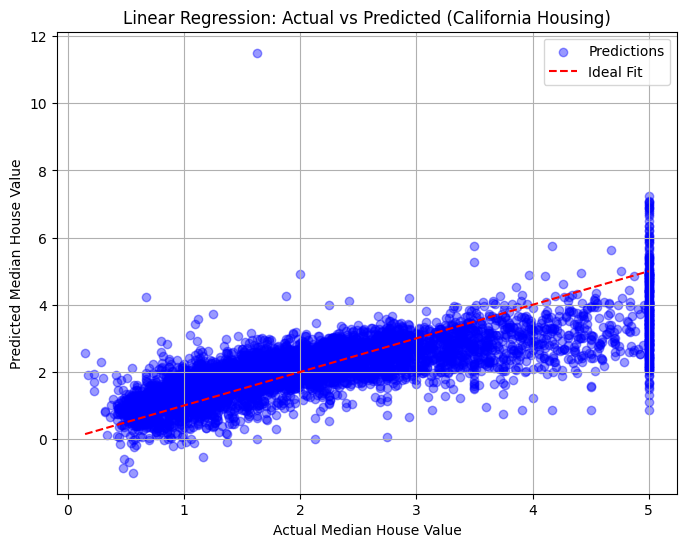

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.4, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Linear Regression: Actual vs Predicted (California Housing)')
plt.legend()
plt.grid(True)
plt.show()


### Save the Trained Model

In [8]:
# === Save model ===
joblib.dump(lr, "linear_regression_california_housing.joblib")
print("Model saved as 'linear_regression_california_housing.joblib'.")


Model saved as 'linear_regression_california_housing.joblib'.
